<a href="https://colab.research.google.com/github/aryanycce/ML-practicals/blob/main/MLprac3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("muhammadshahidazeem/customer-churn-dataset")

print("Path to dataset files:", path)

100%|██████████| 6.66M/6.66M [00:00<00:00, 128MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/muhammadshahidazeem/customer-churn-dataset/versions/1


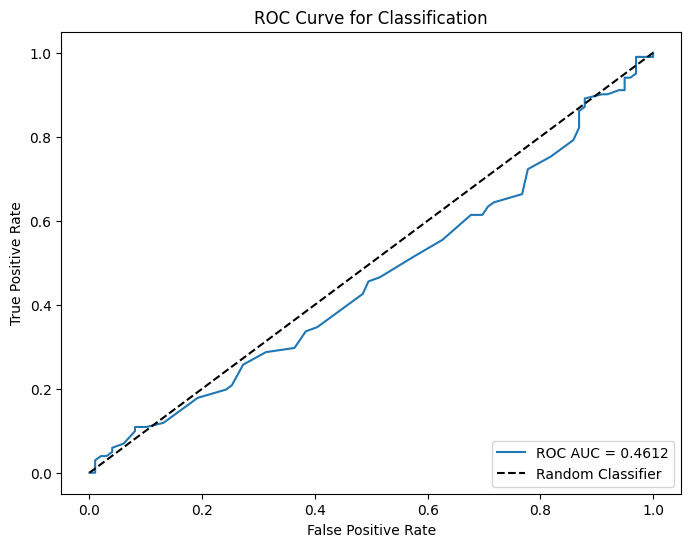

In [8]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, classifier.predict_proba(X_test_scaled)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Classification')
plt.legend(loc='lower right')
plt.show()

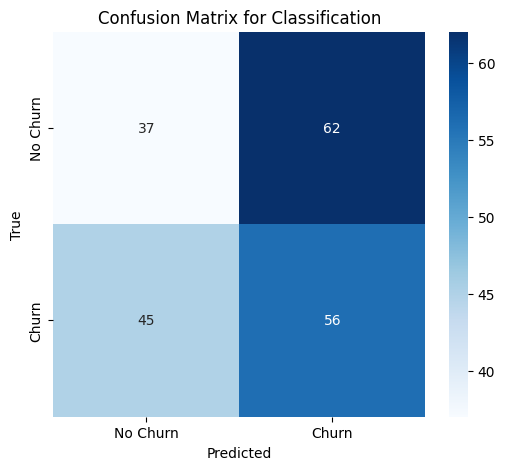

In [9]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Classification')
plt.show()

In [10]:
# Regression Model: Linear Regression (For Churn Probability Prediction)
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

# Predict churn probabilities (regression)
y_pred_reg = regressor.predict(X_test_scaled)

# Evaluate Regression Metrics (for predicted probabilities)
mae = mean_absolute_error(y_test, y_pred_reg)
mse = mean_squared_error(y_test, y_pred_reg)
rmse = np.sqrt(mse)

print("\nRegression Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")



Regression Evaluation Metrics:
Mean Absolute Error (MAE): 0.4983
Mean Squared Error (MSE): 0.2490
Root Mean Squared Error (RMSE): 0.4990


In [ ]:
#bonus

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, roc_curve, auc, mean_squared_error, r2_score
from sklearn.feature_selection import SelectFromModel


In [16]:
# Load dataset
df = pd.read_csv('churn-bigml-20.csv')

# Show basic info and the first few rows
print(df.info())
print(df.head())

# Display correlation heatmap for exploratory data analysis
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

ValueError: could not convert string to float: 'LA'

<Figure size 1000x800 with 0 Axes>

In [17]:
# Handle missing values, assuming missing data can be filled with median (this can vary)
df.fillna(df.median(), inplace=True)

# Encode categorical features if needed (e.g., using one-hot encoding or Label Encoding)
# Example for encoding categorical columns
df = pd.get_dummies(df, drop_first=True)

# Split dataset into features (X) and target (y)
X = df.drop('churn', axis=1)  # Replace 'churn' with the actual target column
y = df['churn']


TypeError: Cannot convert [['LA' 'IN' 'NY' ... 'VT' 'WV' 'CT']
 ['No' 'No' 'No' ... 'No' 'No' 'Yes']
 ['No' 'No' 'No' ... 'No' 'No' 'No']] to numeric

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


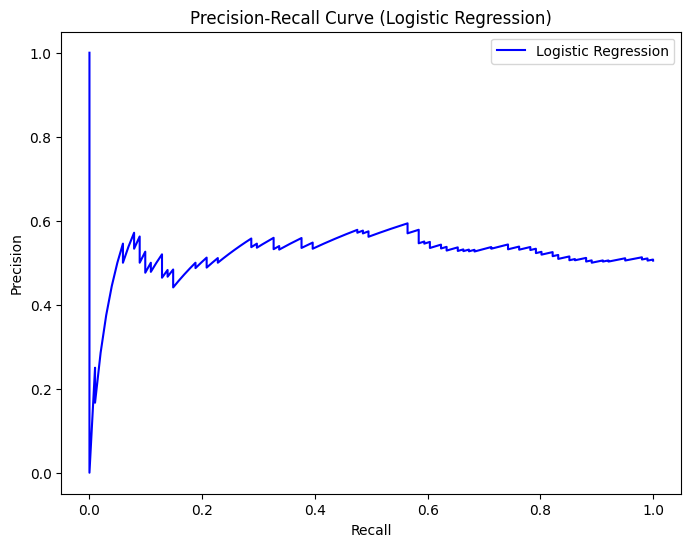

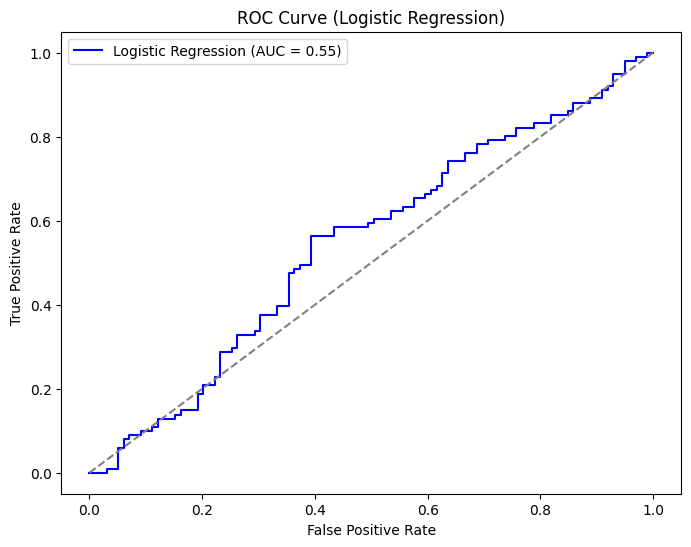

In [19]:
# Initialize and train logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict probabilities for ROC and Precision-Recall
y_probs_logreg = log_reg.predict_proba(X_test)[:, 1]

# Plot Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_probs_logreg)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', label='Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Logistic Regression)')
plt.legend()
plt.show()

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs_logreg)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Logistic Regression)')
plt.legend()
plt.show()
